# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Observations:
# 1.) Based on mean tumor volume for each regimen, Capomulin and Ramicane could be the most effective treatments,
# with smallest tumor volume on average

# 2.) Ramicane also had one of the largest test groups of any regimen, which may give more credit to this regimen's effectiveness.

# 3.) Some graphs involving mouse weight did not seem to match expected output. Upon reviewing the resource file, weight appears
# static for each mouse. The weight should decrease with tumor volume, in theory.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mr = mouse_metadata.merge(study_results)

# Display the data table for preview
mr

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
micec = len(mr['Mouse ID'].unique())
micec

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dm = mr[mr.duplicated(['Mouse ID', 'Timepoint'])]
dm

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dmdata = mr[mr.values == 'g989']
dmdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mrc = mr.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

mrc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
# Dropped duplicated values which keeps one uniqie dataset for mouse g989
micecount = len(mrc['Mouse ID'].unique())
micecount
dmdatac = mrc[mrc.values == 'g989']
print(dmdatac , micecount)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
910           48.786801                 0  
912           51.745156                 0  
914           51.325852                 1  
916           55.326122                 1  
918           56.045564                 1  
919           59.082294                 1  

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
meantv = mrc.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medtv = mrc.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
vartv = mrc.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevtv = mrc.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
semtv = mrc.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
sumstat = pd.DataFrame()
sumstat.index.names = ['Drug Regimen']
sumstat['Mean Tumor Volume'] = meantv
sumstat['Median Tumor Volume'] = medtv
sumstat['Variance Tumor Volume'] = vartv
sumstat['STDEV Tumor Volume'] = stdevtv
sumstat['SEM Tumor Volume'] = semtv
sumstat

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STDEV Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, '# Mice per Treatment')

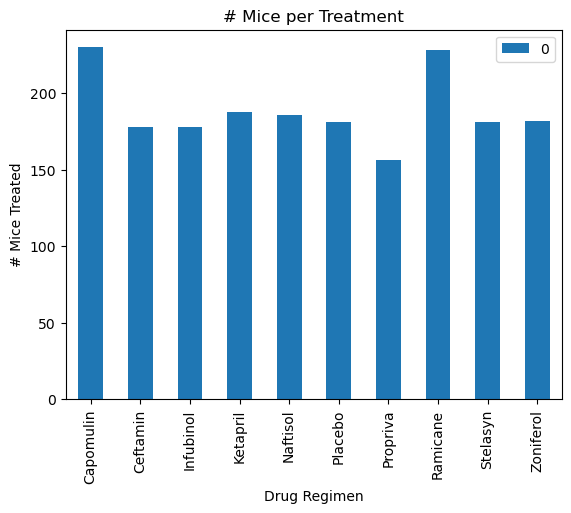

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Pull data
yax = mrc.groupby('Drug Regimen').size()
#send to df
y=yax.to_frame()

#Plot df
bplot = y.plot.bar()
bplot.set_ylabel('# Mice Treated')
bplot.set_title('# Mice per Treatment')


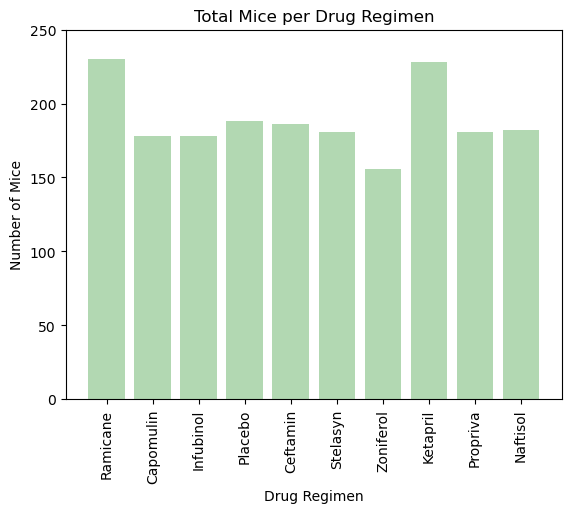

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mrc['Drug Regimen'].unique()
mice = mrc.groupby('Drug Regimen')['Mouse ID'].count()
plt.bar(x_axis, mice, color='g', alpha=0.3, align="center")
plt.xticks(rotation=90)
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, max(mice)+20)
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

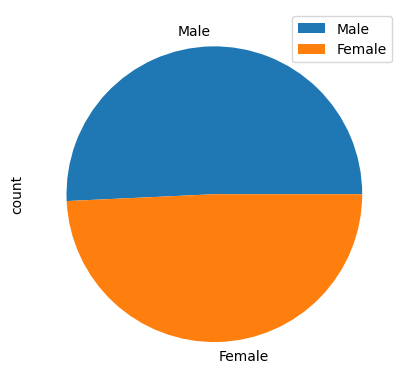

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mrc['Sex'].value_counts()
s = sex.to_frame()
s.plot.pie(subplots = True)

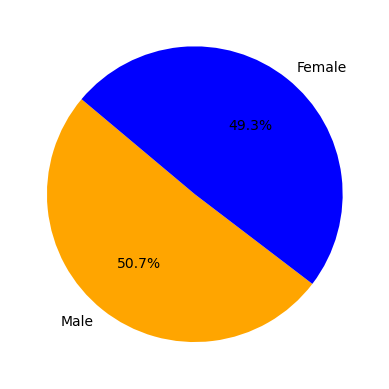

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = mrc['Sex'].value_counts()
colors = ['orange', 'blue']
ss = ['Male', 'Female']
plt.pie(sex, labels=ss, colors=colors,
        autopct="%1.1f%%", startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tvdf = pd.DataFrame()
tvdf = mrc.loc[mrc['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]
tvdf
# Start by getting the last (greatest) timepoint for each mouse
ftp = tvdf.loc[tvdf.groupby('Mouse ID')['Timepoint'].idxmax()]
ftp
ftv = tvdf.iloc[:,6]
ftp
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
newmouse = mrc.copy()
newdf = newmouse.merge(ftp, on='Mouse ID')
newdf

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,Male,21,16,45,22.050126,1
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,Male,21,16,45,22.050126,1
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,Male,21,16,45,22.050126,1
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,Male,21,16,45,22.050126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,z581,Infubinol,Female,24,25,25,54.316407,2,Infubinol,Female,24,25,45,62.754451,3
810,z581,Infubinol,Female,24,25,30,56.286750,2,Infubinol,Female,24,25,45,62.754451,3
811,z581,Infubinol,Female,24,25,35,58.628399,3,Infubinol,Female,24,25,45,62.754451,3
812,z581,Infubinol,Female,24,25,40,60.053740,3,Infubinol,Female,24,25,45,62.754451,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

Treatments = newdf['Drug Regimen_x'].unique()
Treatments.tolist()
# Create empty list to fill with tumor vol data (for plotting)
TV = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
q3, q1 = np.percentile(ftv, [75 ,25])
iqr = q3-q1
print(q1,q3,iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
tv = ftp['Tumor Volume (mm3)']

    # add subset 

    
    # Determine outliers using upper and lower bounds
ol = tvdf[(tvdf['Tumor Volume (mm3)'] < q1) | (tvdf['Tumor Volume (mm3)'] > q3)]
ol

40.220170787499995 50.356470630000004 10.136299842500009


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


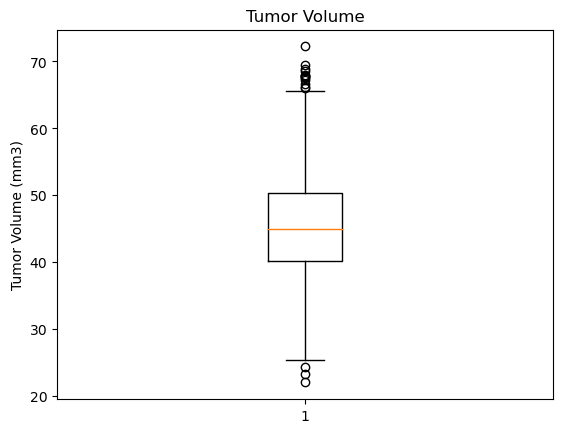

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ftv)
plt.show()

## Line and Scatter Plots

In [16]:
#Find mice treated by Capomulin
capmice = mrc[mrc.values == 'Capomulin']
#Select data for mouse s185 (random Capomulin treated mouse)
cmd = mrc[mrc.values == 's185']
capmice['Mouse ID'].unique()
cmd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


<Axes: title={'center': 'Capomulin Treatment of Mouse s185'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

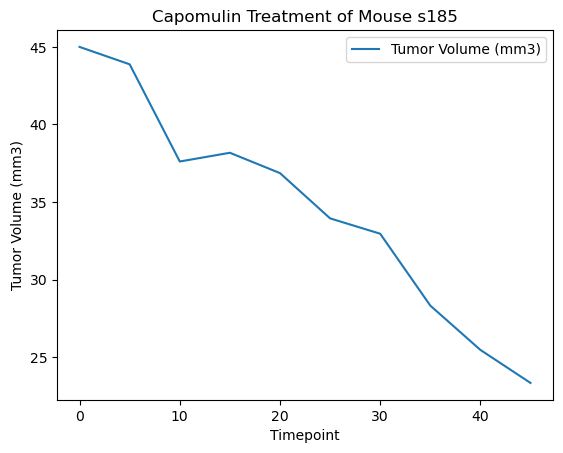

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cmd.plot(x='Timepoint', y='Tumor Volume (mm3)', ylabel = 'Tumor Volume (mm3)', title = 'Capomulin Treatment of Mouse s185')

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

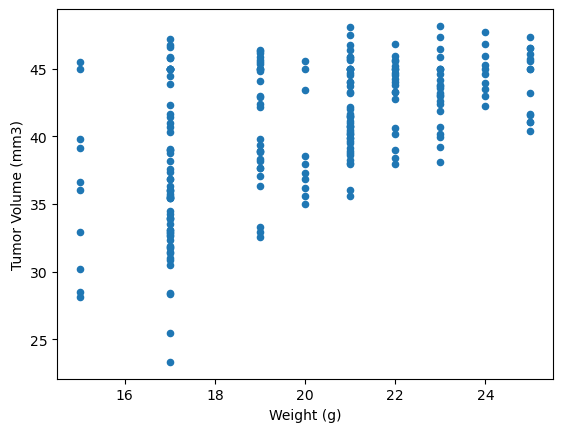

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capmice.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

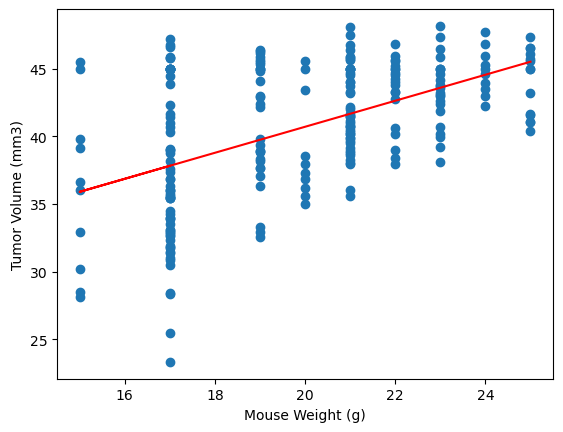

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient, p_value = st.pearsonr(capmice['Weight (g)'], capmice['Tumor Volume (mm3)'])
slope, intercept, r_value, p_value, std_err = st.linregress(capmice['Weight (g)'], capmice['Tumor Volume (mm3)'])

plt.scatter(capmice['Weight (g)'], capmice['Tumor Volume (mm3)'])
plt.plot(capmice['Weight (g)'], intercept + slope*capmice['Weight (g)'], color='red')

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()